<a href="https://colab.research.google.com/github/lauradanielamedinapa/Proyecto-IA-Clasificador-de-flores/blob/main/2162057_2152857.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **CLASIFICADOR DE FLORES**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


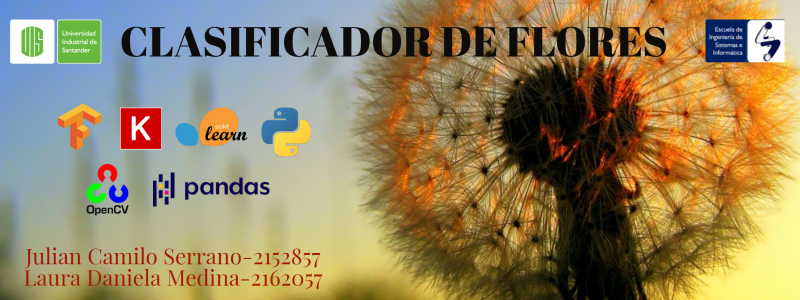

In [ ]:
from IPython.display import Image 
Image('/content/drive/My Drive/Proyecto IA/flores.png')

**Introducción:**  Este proyecto se desarrolló con el fin de implementar modelos de clasificación y redes convolucionales aprendidas en Inteligencia Artificial aplicadas a los procesos de producción agrícola del país como lo es la industria floricultora, entendiendo que, en las temporadas de gran producción la cantidad de flores recogidas para ser exportadas en el mercado internacional es muy amplia, por tal motivo su clasificación toma demasiado tiempo y tiende a ser un proceso complejo.

**Objetivo:** Clasificación de imágenes de flores de 5 especies diferentes utilizando modelos de Machine Learning.

**Dataset:** https://www.kaggle.com/alxmamaev/flowers-recognition

**Presentado por** Julian Camilo Serrano Herrera, Laura Daniela Medina Paipilla

 **LIBRERIAS**


In [ ]:
import numpy as np 
import cv2
import os
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten, Dropout, Dense, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import *
from PIL import Image
from google.colab.patches import cv2_imshow


**IMPORTACIÓN DEL DATASET** (Obtenido de kaggle.com)

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        directory = '/content/drive/My Drive/Proyecto IA/flowers',
        target_size=(100, 100),
        batch_size=32,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        directory = '/content/drive/My Drive/Proyecto IA/flowers',
        target_size=(100, 100),
        batch_size=32,
        class_mode='binary')

Found 4317 images belonging to 5 classes.
Found 4317 images belonging to 5 classes.


Verificación de la importación del dataset.


In [ ]:
base_dir =  r'/content/drive/My Drive/Proyecto IA/flowers'
folders = os.listdir(base_dir)
print(folders)

['sunflower', 'rose', 'tulip', 'daisy', 'dandelion', 'archive.zip']


Guardamos las imagenes en diferentes variables. 

In [ ]:
rosa = sorted(os.listdir(base_dir +'/rose'))
margarita =  sorted(os.listdir(base_dir +'/daisy'))
tulipan = sorted(os.listdir(base_dir +'/tulip'))
girasol =  sorted(os.listdir(base_dir +'/sunflower'))
dientedeleon =  sorted(os.listdir(base_dir +'/dandelion'))
#Cantidad de imágenes que se tienen de cada clase
print("cantidad de imágenes:")
print("rosa :",len(rosa))
print("margarita :",len(margarita))
print("tulipan :",len(tulipan))
print("girasol :",len(girasol))
print("dientedeleon :",len(dientedeleon))

cantidad de imágenes:
rosa : 784
margarita : 764
tulipan : 984
girasol : 733
dientedeleon : 1052


**Primer Tratamiento**: Reducción de las dimensiones de las imágenes y se pasan a escala de grises creando las listas con los datos (X), y los labels o clases (Y) 

In [ ]:

data = [] #X
labels = []#y
#Se realiza el proceso para la primera carpeta (rose) y agregamos al label un valor de 0
for k in rosa:
  img = cv2.imread(base_dir +'/rose/'+k) 
  gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gris = cv2.resize(gris, (128,128))
  data.append(gris.flatten())
  labels.append(0)

#Se realiza el proceso para la segunda carpeta (daisy) y agregamos al label un valor de 1
for l in margarita:
  img = cv2.imread(base_dir +'/daisy/'+l) 
  gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gris = cv2.resize(gris, (128,128))
  data.append(gris.flatten())
  labels.append(1)

#Se realiza el proceso para la tercera carpeta (tulip) y agregamos al label un valor de 2
for i in tulipan:
  img = cv2.imread(base_dir +'/tulip/'+i) 
  gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gris = cv2.resize(gris, (128,128))
  data.append(gris.flatten())
  labels.append(2)

#Se realiza el proceso para la cuarta carpeta (sunflower) y agregamos al label un valor de 3
for j in girasol:
  img = cv2.imread(base_dir +'/sunflower/'+j) 
  gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gris = cv2.resize(gris, (128,128))
  data.append(gris.flatten())
  labels.append(3)

#Se realiza el proceso para la cuarta carpeta (dandelion) y agregamos al label un valor de 4
for z in dientedeleon:
  img = cv2.imread(base_dir +'/dandelion/'+z) 
  gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gris = cv2.resize(gris, (128,128))
  data.append(gris.flatten())
  labels.append(4)

Se almacenan los archivos en dos arrays que conformaran el dataset y lo normalizamos antes de iterar para que evitar que su costo crezca exponencialmente.

In [ ]:
 imagenes = np.array(data)
labels = np.array(labels)

In [ ]:
 imagenes = imagenes.astype(np.float32)
labels = labels.astype(np.int32)
imagenes = imagenes/255

Permutamos el dataset para que sus datos queden revueltos.

In [ ]:
 p = np.random.permutation(range(len(imagenes)))
imagenes = imagenes[p]
labels = labels[p]

In [ ]:
grafica=[]
for i in labels:
  if i == 1:
    pie.append("girasol")
  else:
    pie.append("rosa")

label_pie= pd.DataFrame(pie,columns=["a"])
labels2plt = list(label_pie['a'].unique())
y = list(label_pie['a'].value_counts())
plt.pie(y, labels=labels2plt, autopct='%1.1f%%', startangle=90)
plt.title('Cantidad de datos en cada clase')
plt.show()

NameError: ignored

Dividimos los datos en 30% para test y 70% para entrenamiento

In [ ]:
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(imagenes, labels, test_size = 0.3, random_state = 111)

**Implementación de los modelos de clasificación**


**GaussianNB**

In [ ]:
from sklearn.naive_bayes import GaussianNB

estimador = GaussianNB()

estimador.fit(X_tr,y_tr)
predicciones = estimador.predict(X_tr)
score = cross_val_score(estimador, X_tr, y_tr, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy score: %.3f (+/- %.5f)"%(np.mean(score), np.std(score)))

accuracy score: 0.414 (+/- 0.03928)


**DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

estimador = DecisionTreeClassifier(max_depth=20)

estimador.fit(X_tr, y_tr)
predicciones = estimador.predict(X_te)
score = cross_val_score(estimador, X_te, y_te, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy score: %.3f (+/- %.5f)"%(np.mean(score), np.std(score)))

accuracy score: 0.487 (+/- 0.04822)


**RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

estimador = RandomForestClassifier()

estimador.fit(X_tr, y_tr)
predicciones = estimador.predict(X_te)
score = cross_val_score(estimador, X_te, y_te, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy score1 %.3f (+/- %.5f)"%(np.mean(score), np.std(score)))

accuracy score1 0.609 (+/- 0.08866)



**Implementación de SVC**: Dejamos el kernel por defecto rbf al deducir que nos muestra mejores resultados

In [ ]:
from sklearn.svm import SVC

estimador = SVC()

estimador.fit(X_tr, y_tr)
predicciones = estimador.predict(X_te)
score = cross_val_score(estimador, X_te, y_te, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy score %.3f (+/- %.5f)"%(np.mean(score), np.std(score)))

accuracy score 0.541 (+/- 0.05770)


**Segundo Tratamiento:**Tratamiento de los datos para implementar la CNN, usando RGB

In [ ]:
data = [] #X o caracteristicas
labels = [] #y o clases
#carga la imagenes

for k in rosa:
  try:
    img = cv2.imread(base_dir +'/rose/'+k) #libreria de openCv para leer imagenes y videos // guardamos la imagen con ese nombre porque en py es comun utilizar toda la ruta
    img =cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    resized=cv2.resize(img,(128,128))
    
    data.append(np.array(resized))
    labels.append(0)

  except AttributeError:
    print('')

for l in margarita:
  try:
    img = cv2.imread(base_dir +'/daisy/'+l) #libreria de openCv para leer imagenes y videos // guardamos la imagen con ese nombre porque en py es comun utilizar toda la ruta
    img =cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    resized=cv2.resize(img,(128,128))
    
    data.append(np.array(resized))
    labels.append(1)

  except AttributeError:
    print('')

for i in tulipan:
  try:
    img = cv2.imread(base_dir +'/tulip/'+i) #libreria de openCv para leer imagenes y videos // guardamos la imagen con ese nombre porque en py es comun utilizar toda la ruta
    img =cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    resized=cv2.resize(img,(128,128))
    data.append(np.array(resized))
    labels.append(2)

  except AttributeError:
    print('')

for j in girasol:
  try:
    img = cv2.imread(base_dir +'/sunflower/'+j) #libreria de openCv para leer imagenes y videos // guardamos la imagen con ese nombre porque en py es comun utilizar toda la ruta
    img =cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    resized=cv2.resize(img,(128,128))
    
    data.append(np.array(resized))
    labels.append(3)

  except AttributeError:
    print('')

for z in dientedeleon:
  try:
    img = cv2.imread(base_dir +'/dandelion/'+z) #libreria de openCv para leer imagenes y videos // guardamos la imagen con ese nombre porque en py es comun utilizar toda la ruta
    img =cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    resized=cv2.resize(img,(128,128))
    data.append(np.array(resized))
    labels.append(4)

  except AttributeError:
    print('')

Almacenamiento de los datos en dos arrays.


In [ ]:
imagenes = np.array(data)
labels = np.array(labels)

In [ ]:
print('imagenes : {} | labels : {}'.format(imagenes.shape , labels.shape))

imagenes : (4317, 128, 128, 3) | labels : (4317,)


Ilustración de imágenes






In [ ]:
def especie_planta(imagen):
  if imagen == 0: 
    nombre = 'rosa'
  if imagen == 1: 
    nombre = 'margarita'
  if imagen == 2: 
    nombre = 'tulipan'
  if imagen == 3: 
    nombre = 'girasol'
  if imagen == 4: 
    nombre = 'dientedeleon'
  return nombre

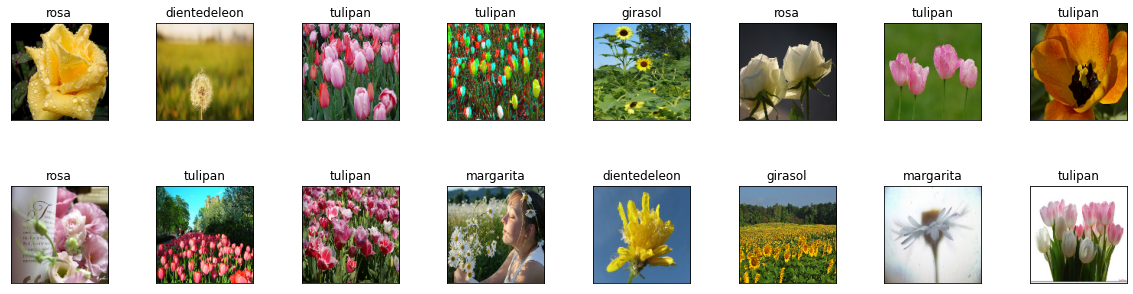

In [ ]:
 plt.figure(1, figsize=(20,5))
n=0
for i in range(16):
  n += 1
  r = np.random.randint(0, imagenes.shape[0], 1)
  plt.subplot(2, 8, n) #numero de filas y cantidad de columnas de la grafica
  plt.subplots_adjust(hspace = 0.5, wspace =0.5)
  plt.imshow(imagenes[r[0]])
  plt.title('{}'.format(especie_planta(labels[r[0]]), labels[r[0]]))
  plt.xticks([]), plt.yticks([])

plt.show()

In [ ]:
 p = np.random.permutation(range(len(imagenes)))
imagenes = imagenes[p]
labels = labels[p]

Ahora dividimos los datos en 20% test y 80% entrenamiento

In [ ]:
 from sklearn.model_selection import train_test_split
#split para entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(imagenes, labels, test_size = 0.2, random_state = 111)

In [ ]:
X_train = X_train.reshape([-1, 128, 128, 3])
X_test = X_test.reshape([-1, 128, 128, 3])

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

y_test = tf.keras.utils.to_categorical(y_test)
y_train = tf.keras.utils.to_categorical(y_train) 

X_train /= 255
X_test /= 255
print('x_train shape:', X_train.shape)
print('Numero de imagenes en x_train', X_train.shape[0], "y_train:", y_train.shape)
print('Numero de imagenes in x_test', X_test.shape[0], "y_test: ", y_test.shape)

x_train shape: (3453, 128, 128, 3)
Numero de imagenes en x_train 3453 y_train: (3453, 5)
Numero de imagenes in x_test 864 y_test:  (864, 5)


**Clasificación con CNN** 

In [ ]:
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(5, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 128)       0

Ejecución del estimador.

In [ ]:
  model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
              metrics=['accuracy'])
print('Compiled!')

Compiled!


Entrenamiento para no llegar a un overfitting.

In [ ]:
 class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.987 ):
            print("\nReached 98.7% accuracy so cancelling training!")
            self.model.stop_training = True 

In [ ]:
 callbacks=myCallback()
history = model.fit(X_train,y_train, batch_size = 64, epochs=40,  validation_split = 0.2,
                    callbacks = callbacks,
                    verbose=1, shuffle=True)

Epoch 1/40
44/44 [==============================] - 75s 2s/step - loss: 0.6642 - accuracy: 0.2929 - val_loss: 0.4399 - val_accuracy: 0.4732
Epoch 2/40
44/44 [==============================] - 72s 2s/step - loss: 0.4375 - accuracy: 0.4222 - val_loss: 0.4163 - val_accuracy: 0.5051
Epoch 3/40
44/44 [==============================] - 72s 2s/step - loss: 0.4144 - accuracy: 0.4714 - val_loss: 0.4043 - val_accuracy: 0.4544
Epoch 4/40
44/44 [==============================] - 71s 2s/step - loss: 0.4037 - accuracy: 0.4801 - val_loss: 0.3891 - val_accuracy: 0.5007
Epoch 5/40
44/44 [==============================] - 70s 2s/step - loss: 0.3858 - accuracy: 0.5109 - val_loss: 0.3724 - val_accuracy: 0.5384
Epoch 6/40
44/44 [==============================] - 70s 2s/step - loss: 0.3620 - accuracy: 0.5644 - val_loss: 0.3681 - val_accuracy: 0.5514
Epoch 7/40
44/44 [==============================] - 71s 2s/step - loss: 0.3472 - accuracy: 0.5978 - val_loss: 0.3695 - val_accuracy: 0.5311
Epoch 8/40
44/44 [==

Realización de test.

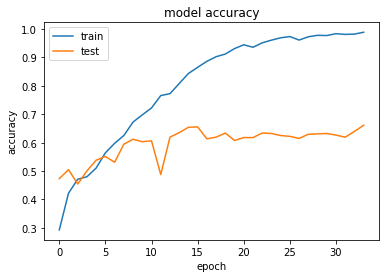

In [ ]:
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')

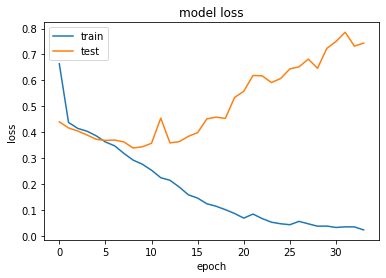

In [ ]:
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
loss, acc = model.evaluate(X_train, y_train)
loss, acc

108/108 [==============================] - 23s 216ms/step - loss: 0.1546 - accuracy: 0.9299


(0.15460523962974548, 0.9299160242080688)

In [ ]:
 loss, acc = model.evaluate(X_test, y_test)
loss, acc

27/27 [==============================] - 6s 217ms/step - loss: 0.7960 - accuracy: 0.6389


(0.7960014343261719, 0.6388888955116272)

**CONCLUSIONES**


*   Utilizando los métodos de clasificación habituales GaussianNB, DecisionTreeClassifier, SVC el accuracy obtenido estuvo dentro del mismo rango , mientras que con el método RandomForestClassifier el accuracy fue mayor. 


*   En la implementación de la red neuronal, con los siguientes valores: batch=64, epoch= 20 se obtuvieron los siguientes puntajes: 71.18% para datos de entrenamiento y 56.59% para los datos de test, lo cual quiere notar la diferencia significativa y es por esto que es el accuracy más conveniente. 



